# Project 5 - Heart Disease (Dynamic)

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
hd = pd.read_csv('Data/heart_diease.csv', header=None)
hd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
# adding column name to the respective columns
hd.columns = ['age','sex','cp','trestbps','chol','fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


Gonna describe briefly the columns below

age in years

sex (1 = male; 0 = female)

cp chest pain type(angina)

trestbpsm resting blood pressure (in mm Hg on admission to the hospital)

chol serum cholestoral in mg/dl

fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecgresting electrocardiographic results

thalach maximum heart rate achieved

exang exercise induced angina (1 = yes; 0 = no)

oldpeakST depression induced by exercise relative to rest

slope the slope of the peak exercise ST segment

ca number of major vessels (0-3) colored by flourosopy

thal 3 = normal/ 6 = fixed defect /7 = reversable defect

target  0, 1,2,3,4

In [5]:
# Check the uniqueness in the dataset
for i in hd.columns:
    print('i: %s and unique: %s' % (i, hd[i].unique()))

i: age and unique: [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
i: sex and unique: [1 0]
i: cp and unique: [4 3 2 1]
i: trestbps and unique: ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' '?' '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
i: chol and unique: ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' '?' '160' '312' '283' '142' '211' '306' '222' '202'
 '197' '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243

In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


## Missing Values

In [7]:
hd.isin(['?']).sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64

In [8]:
# Check the percentage of missing values

missing_values = hd.isin(['?']).sum()
missing_values_percent =round(100*(hd.isin(['?']).sum()/len(hd)),2)
dtype = hd.dtypes
info_hd = pd.DataFrame({'Missing Value Count':missing_values,'% of Missing':missing_values_percent,'DTYPE': dtype})
info_hd.sort_values(by = '% of Missing',inplace=True,ascending=False)
info_hd

,Missing Value Count,% of Missing,DTYPE
ca,198,99.0,object
thal,166,83.0,object
slope,102,51.0,object
trestbps,56,28.0,object
oldpeak,56,28.0,object
thalach,53,26.5,object
exang,53,26.5,object
chol,7,3.5,object
fbs,7,3.5,object
age,0,0.0,int64


Observation: slope, ca, thal columns having the maxing null values i.e. more than 30% percentage null values

In [9]:
# Dropping the columns whose have more than 30% percentage null values

hd.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,1
196,62,1,1,?,139,0,1,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,2
198,58,1,4,?,385,1,2,?,?,?,0


In [10]:
# Replace '?' to nan

hd.replace('?', np.nan, inplace=True)

In [11]:
# dropping the rows whose having more than 3 nan values
print(hd.shape)

hd.dropna(thresh=hd.shape[1]-3, axis=0, inplace=True)

print(hd.shape)

(200, 11)
(147, 11)


In [12]:
# Check the null values again with nan
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    3
chol        4
fbs         7
restecg     0
thalach     0
exang       0
oldpeak     3
target      0
dtype: int64

In [13]:
# Checking the dtypes
hd.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
target       int64
dtype: object

In [14]:
# Converting exang & thalach to int

hd['thalach'] = hd['thalach'].astype('int')
hd['exang'] = hd['exang'].astype('int')

In [15]:
# replacing the null values with the median by using Simple Imputer

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')

for i in ['trestbps', 'chol', 'fbs', 'oldpeak']:
    hd[i] = imp.fit_transform(hd[i].values.reshape(-1, 1))
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140.0,260.0,0.0,1,112,1,3.0,2
1,44,1,4,130.0,209.0,0.0,1,127,0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140,1,1.5,2
3,55,1,4,142.0,228.0,0.0,1,149,1,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.0,170.0,0.0,1,138,1,0.0,1
194,46,1,4,134.0,310.0,0.0,0,126,0,0.0,2
195,54,0,4,127.0,333.0,1.0,1,154,0,0.0,1
197,55,1,4,122.0,223.0,1.0,1,100,0,0.0,2


Converting the target variable from heart diseases or no heart disease

heart Disease :1,2,3,4

No heart Diesase : 0

Converting 1,2,3,4 --> 1 means having heart diease

In [16]:
hd['target'] = hd['target'].replace({2:1, 3:1, 4:1})
hd['target'].unique()

array([1, 0], dtype=int64)

## Summary Statstics

In [17]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,59.312925,0.965986,3.612245,133.687075,173.020408,0.319728,0.721088,122.795918,0.646259,1.324490,0.782313
std,7.853803,0.181884,0.716240,21.321994,114.545586,0.467965,0.690268,21.990328,0.479765,1.095107,0.414084
min,37.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,1.000000
50%,60.000000,1.000000,4.000000,130.000000,214.000000,0.000000,1.000000,120.000000,1.000000,1.500000,1.000000
75%,63.000000,1.000000,4.000000,145.000000,254.000000,1.000000,1.000000,140.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,1.000000


Observation:

1. People whose age more than 60 years having severe heart diease 
2. Outliers may present in trestbps and chol because more difference in 75% and max

## Correlation

In [18]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.060245,0.038765,0.210168,0.094531,0.162679,0.061693,-0.174125,0.156823,0.181231,0.206426
sex,0.060245,1.000000,0.003219,0.013132,-0.188673,-0.112769,0.033030,-0.001747,0.018155,0.107372,0.082899
cp,0.038765,0.003219,1.000000,0.096500,0.068889,-0.138458,-0.026294,-0.160306,0.235935,0.044499,0.129138
trestbps,0.210168,0.013132,0.096500,1.000000,0.174400,0.227699,0.106650,-0.011151,0.220104,0.111299,0.093857
chol,0.094531,-0.188673,0.068889,0.174400,1.000000,0.167138,0.022076,-0.043709,0.097098,0.007984,0.022044
fbs,0.162679,-0.112769,-0.138458,0.227699,0.167138,1.000000,0.150735,0.044988,-0.255473,-0.122306,0.008175
restecg,0.061693,0.033030,-0.026294,0.106650,0.022076,0.150735,1.000000,0.014274,-0.093141,-0.122286,-0.070096
thalach,-0.174125,-0.001747,-0.160306,-0.011151,-0.043709,0.044988,0.014274,1.000000,-0.075057,0.178199,-0.051548
exang,0.156823,0.018155,0.235935,0.220104,0.097098,-0.255473,-0.093141,-0.075057,1.000000,0.307316,0.299270
oldpeak,0.181231,0.107372,0.044499,0.111299,0.007984,-0.122306,-0.122286,0.178199,0.307316,1.000000,0.258038


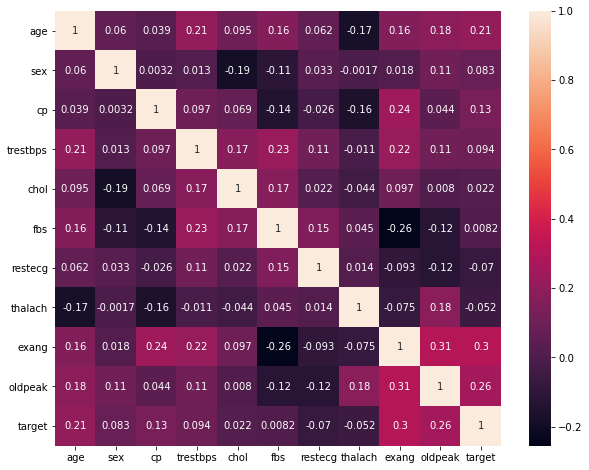

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(hd.corr(), annot=True)

## Data Visualization

### Univarient Analysis

Text(0.5, 0, 'Target')

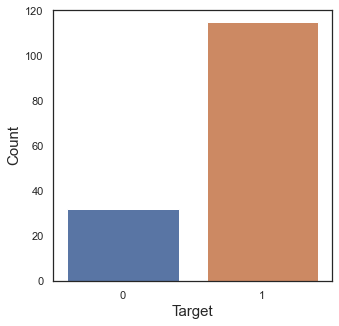

In [20]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[5,5])
sns.set(style='white')
sns.countplot(x = 'target', data = hd)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Target', fontsize=15)
#plt.xticks(rotation = 90, fontsize=10)

Observation: we can observe that the number of people with heart disease is more than with a number of people having no heart disease

Text(0.5, 0, 'Region')

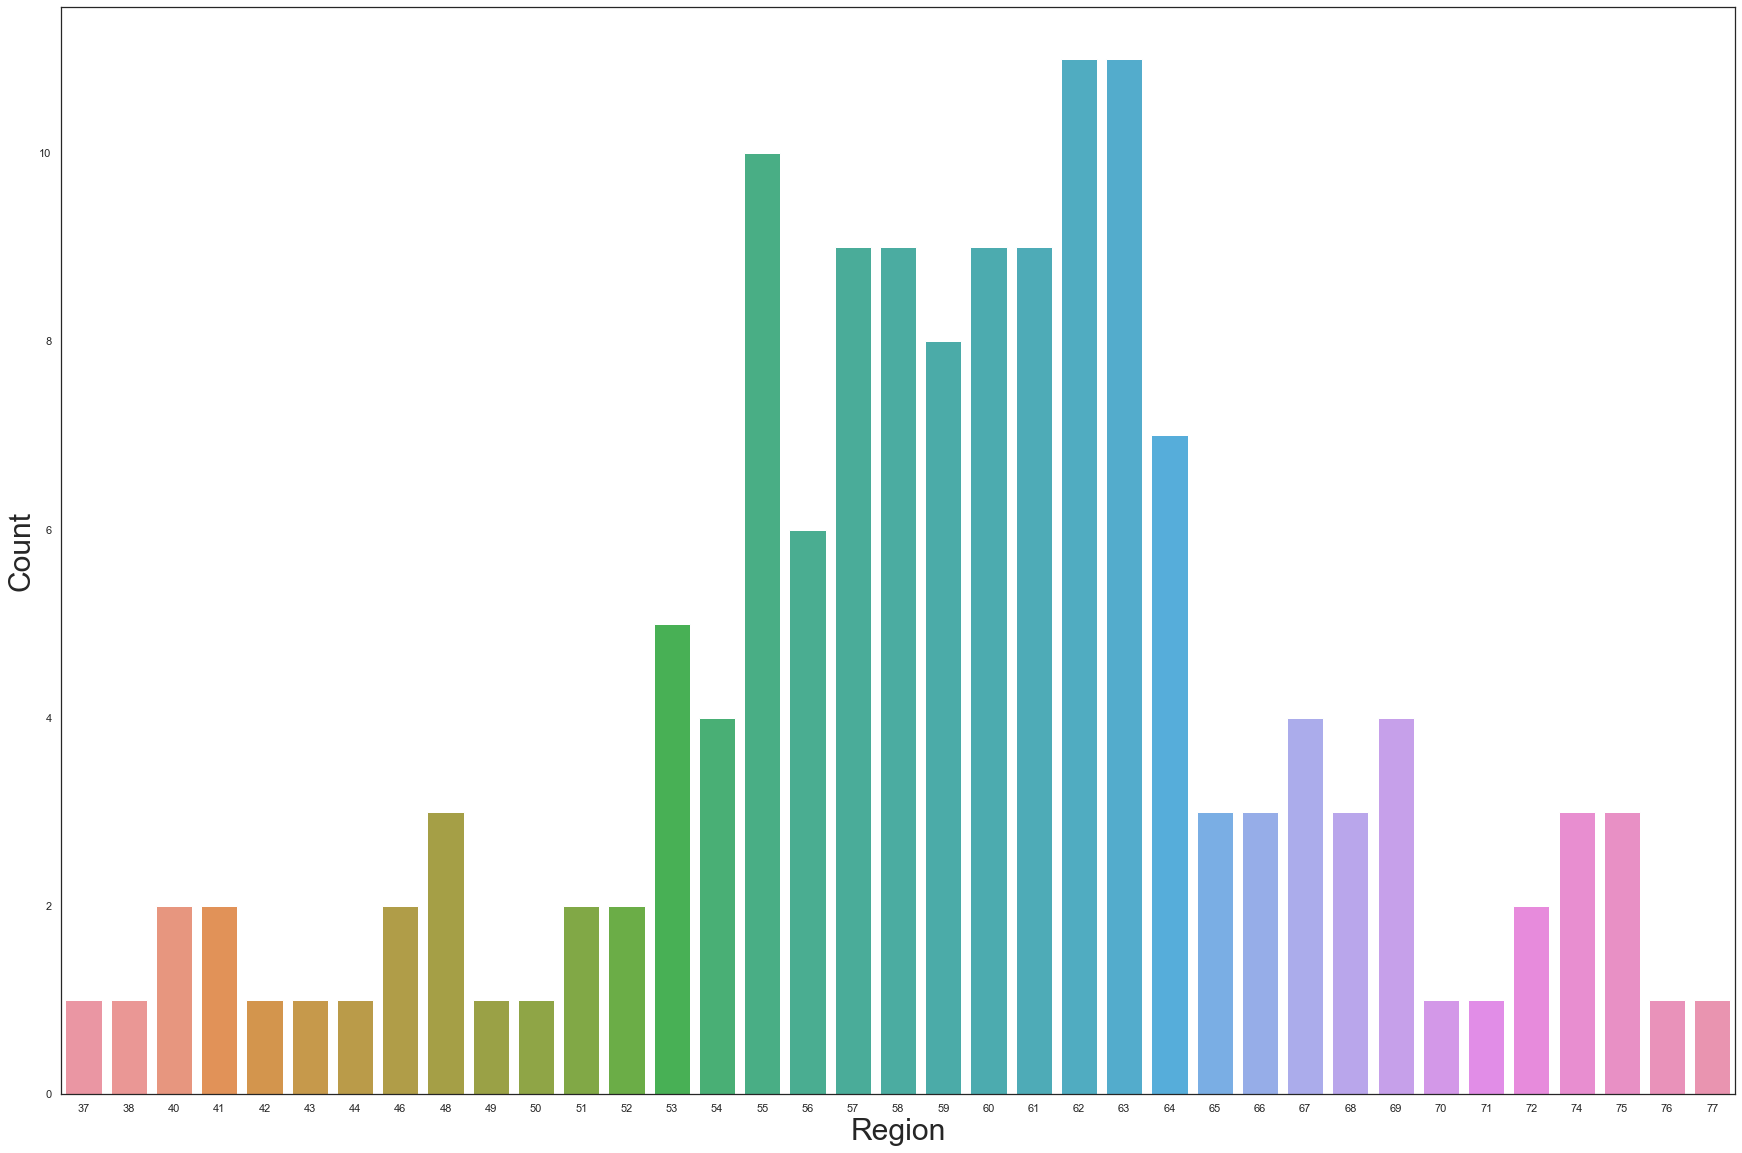

In [21]:
plt.figure(figsize=[30,20])
sns.countplot(hd["age"])
plt.ylabel('Count', fontsize=30)
plt.xlabel('Region', fontsize=30)

Observation: we have a normal distribution, after 63 years old, your chance of heart disease decreases

### Bivarient Analysis

Text(0.5, 1.0, 'Gender v/s target\n')

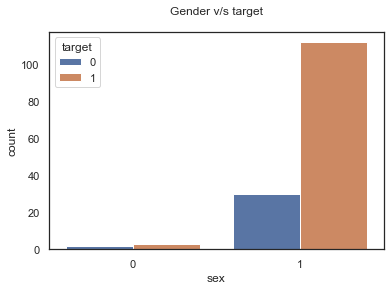

In [22]:
sns.countplot(data= hd, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

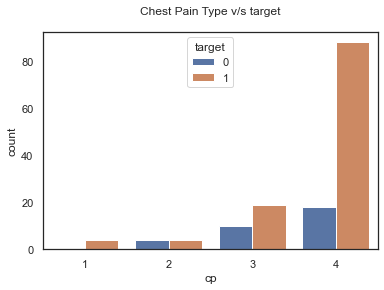

In [23]:
sns.countplot(data= hd, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Observation: Most of the Heart Disease patients are found to have 4th type chest pain

Text(0.5, 1.0, 'Age v/s Target\n')

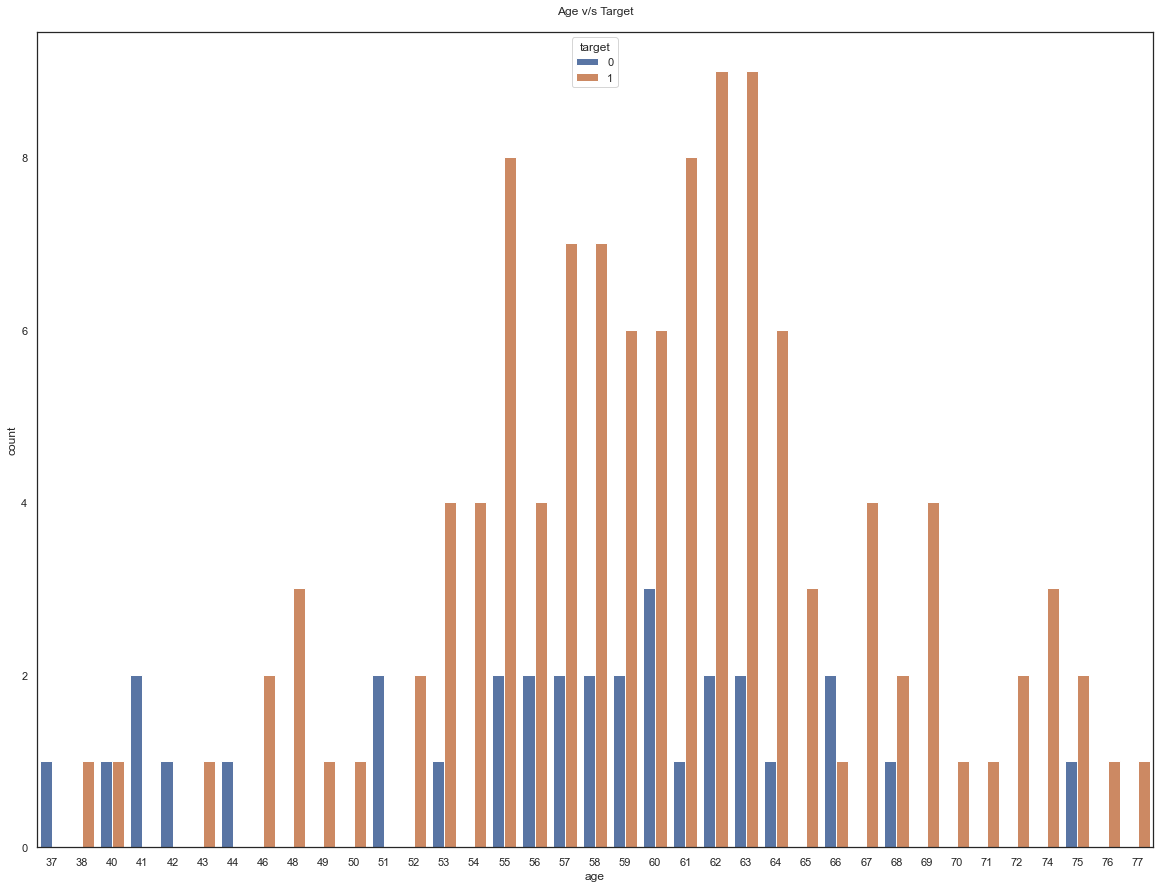

In [24]:
plt.figure(figsize=[20,15])
sns.countplot(data= hd, x='age',hue='target')
plt.title('Age v/s Target\n')

Observation: Age at 55, 64, 63 are suffering more heart dieases

## Plotting the Outliers

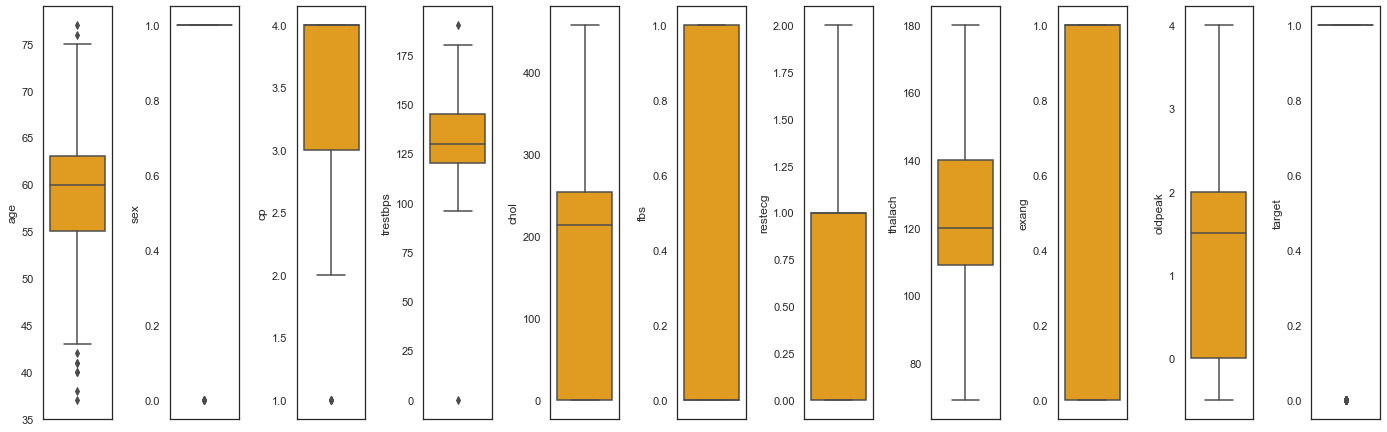

In [25]:
col = hd.columns.values
ncol = 17
nrow = 10

plt.figure(figsize=(30, 60))
for i in range(0, len(col)):
    plt.subplot(nrow, ncol, i+1)
    sns.boxplot(hd[col[i]], color='orange', orient='v')
    plt.tight_layout()

## Distribution of Skewness

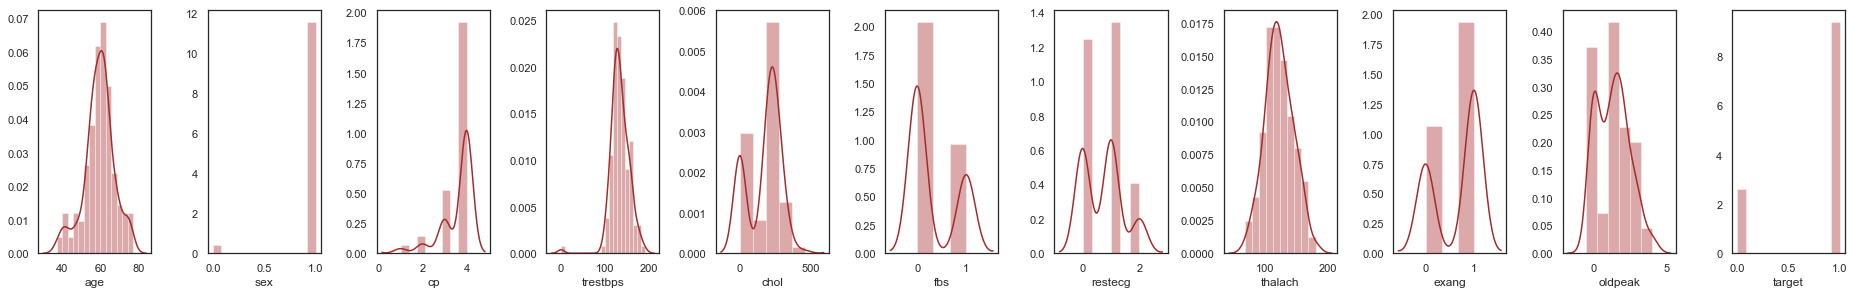

In [26]:
plt.figure(figsize=(40, 40))
for i in range(0, len(col)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(hd[col[i]], color='brown')
    plt.tight_layout()

In [27]:
hd.skew()

age        -0.400521
sex        -5.194676
cp         -1.990051
trestbps   -1.287217
chol       -0.518830
fbs         0.781077
restecg     0.430626
thalach     0.127674
exang      -0.618119
oldpeak     0.353640
target     -1.382360
dtype: float64

## Removing Outliers

In [28]:
# Check the Outliers
from scipy.stats import zscore

# Take without categorical
z_score = abs(zscore(hd))
print(hd.shape)

df_final = hd.loc[(z_score < 3).all(axis=1)]
print(df_final.shape)

(147, 11)
(137, 11)


## Model Training

Now our data are ready!

According to the data, our Target variable 'target' is discrete, so our model is Classification.

Let's now begin to train out Classification model!

We will need to first split up our data into an X array that contains the features to train on, and y array with the target variable

In [29]:
# Separationg independent & dependent variables

df_x = df_final.drop(columns=['target'])
df_y = df_final['target']

In [30]:
# Scaling the input variable

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(df_x)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

max_acc_scr = 0
for r_st in range(10, 25):
    x_train, x_test, y_train, y_test = train_test_split(x, df_y, test_size = 0.3, random_state = r_st)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    acc_scr = accuracy_score(y_test, y_pred)
    
    if max_acc_scr < acc_scr:
        max_acc_scr = acc_scr
        final_r_st = r_st
print('Max accuracy_score %s according to random state : %s' %(max_acc_scr, r_st))

Max accuracy_score 0.9047619047619048 according to random state : 24


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Breaking input & target variables

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, df_y, test_size=.3, random_state=20)

In [34]:
# Using model via for loop

model = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report : \n', classification_report(y_test, y_pred))
    print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is 0.7578947368421053
Accuracy_score: 0.9047619047619048
Confusion Matrix : 
 [[ 1  5]
 [ 4 32]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.86      0.89      0.88        36

    accuracy                           0.79        42
   macro avg       0.53      0.53      0.53        42
weighted avg       0.77      0.79      0.78        42

F1 Score:  90.48

*************** DecisionTreeClassifier() Model ***************

Score of DecisionTreeClassifier() Model is 1.0
Accuracy_score: 0.5714285714285714
Confusion Matrix : 
 [[ 1  5]
 [ 4 32]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.86      0.89      0.88        36

    accuracy                           0.79        42
   

Observation: **KNeighborsClassifier() Model is better because f1_score and accuracy_score is better than other models**

In [35]:
# Cross Validation

from sklearn.model_selection import cross_val_score

model = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x, df_y, cv=5, scoring = 'accuracy')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is [0.82142857 0.78571429 0.77777778 0.74074074 0.7037037 ]
Mean score:  0.7658730158730159
Std score :  0.04029509579822173
Min score :  0.7037037037037037
Max score :  0.8214285714285714

*************** DecisionTreeClassifier() Model ***************

Score of DecisionTreeClassifier() Model is [0.75       0.78571429 0.7037037  0.62962963 0.59259259]
Mean score:  0.6923280423280423
Std score :  0.07218684328335376
Min score :  0.5925925925925926
Max score :  0.7857142857142857

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is [0.89285714 0.78571429 0.77777778 0.81481481 0.74074074]
Mean score:  0.8023809523809524
Std score :  0.05103557905518519
Min score :  0.7407407407407407
Max score :  0.8928571428571429

*************** SVC() Model ***************

Score of SVC() Model is [0.78571429 0.78571429 0.7037037  0.74074074 0.77777778]
Mea

Observation: **KNeighborsClassifier()** scores are better than other model

In [36]:
# KNeighborsClassifier model will give the best parameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

ridge = KNeighborsClassifier()
param = [{'n_neighbors':np.arange(2,33),'n_jobs':[2,6]}]

gsknn=GridSearchCV(KNeighborsClassifier(),param,scoring='accuracy')
gsknn.fit(x_train,y_train)
print('Best parameters set:',gsknn.best_params_)

Best parameters set: {'n_jobs': 2, 'n_neighbors': 8}


In [37]:
# using KNeighborsClassifier model with best results

knn = KNeighborsClassifier(n_jobs=2, n_neighbors=8)
knn.fit(x_train, y_train)

print('Score is %s' % knn.score(x_train, y_train))
predknn = knn.predict(x_test)
print('Accuracy_score: %s' % (accuracy_score(y_test, predknn)))
print('Confusion Matrix : \n', confusion_matrix(y_test, predknn))
print('\nClassification Report : \n', classification_report(y_test, predknn))
print('F1 Score: ',round(f1_score(y_test, predknn, average='micro')*100,2))

Score is 0.7684210526315789
Accuracy_score: 0.9523809523809523
Confusion Matrix : 
 [[ 6  0]
 [ 2 34]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.94      0.97        36

    accuracy                           0.95        42
   macro avg       0.88      0.97      0.91        42
weighted avg       0.96      0.95      0.96        42

F1 Score:  95.24


In [38]:
score = cross_val_score(knn, x, df_y, cv=5, scoring = 'accuracy')
print('Score is %s' % score)
print('Mean score: ', score.mean())
print('Std score : ', score.std())
print('Min score : ', score.min())
print('Max score : ', score.max())

Score is [0.82142857 0.78571429 0.77777778 0.85185185 0.7037037 ]
Mean score:  0.7880952380952381
Std score :  0.04981980912733689
Min score :  0.7037037037037037
Max score :  0.8518518518518519


### AUC ROC

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
y_pred_prob = knn.predict_proba(x_test)[:, 1] # it can be 1 or 0 that means check the 1's i.e. having heart diease in test_x
y_pred_prob

array([0.6, 0.6, 0.8, 0.4, 0.8, 0.8, 0.2, 0.8, 1. , 0.8, 0.8, 0.8, 1. ,
       0.6, 0.8, 0.6, 0.4, 0.8, 1. , 1. , 1. , 0.8, 1. , 1. , 0.4, 0.6,
       0.8, 0.6, 0.8, 0.6, 0.8, 0.8, 0.8, 0.6, 1. , 0.4, 0.6, 0.6, 0.8,
       1. , 0.6, 0.8])

In [41]:
# False Positive Rate & True Positive Rate

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [42]:
fpr

array([0.        , 0.        , 0.        , 0.16666667, 0.83333333,
       1.        ])

In [43]:
tpr

array([0.        , 0.25      , 0.72222222, 1.        , 1.        ,
       1.        ])

In [44]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2])

In [45]:
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_prob))

ROC AUC Score:  0.9768518518518519


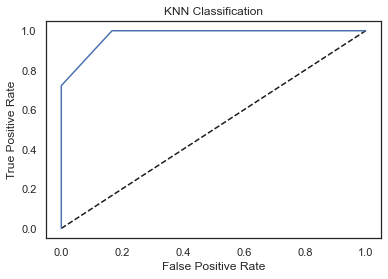

In [46]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='KNN Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classification')
plt.show()

In [47]:
auc_score = roc_auc_score(y_test, knn.predict(x_test))
print('AUC Score:', auc_score)

AUC Score: 0.9166666666666667


In [48]:
print('KNN Classification AUC: ', auc(fpr, tpr))

KNN Classification AUC:  0.9768518518518519


## Using Ensemble Technique to Boostup our Score

In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=20)

# RandomForestClassifier(100)  --> by Default

rf.fit(x_train, y_train)
predrf= rf.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, predrf))
print('Confusion Matrix : \n', confusion_matrix(y_test, predrf))
print('\nClassification Report : \n', classification_report(y_test, predrf))
print('F1 Score: ',round(f1_score(y_test, predrf, average='micro')*100,2))

Accuracy Score:  0.8571428571428571
Confusion Matrix : 
 [[ 3  3]
 [ 3 33]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.92      0.92      0.92        36

    accuracy                           0.86        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.86      0.86      0.86        42

F1 Score:  85.71


In [51]:
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimator=50, learning_rate=1.0)
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
ad_pred = ad.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, ad_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, ad_pred))
print('\nClassification Report : \n', classification_report(y_test, ad_pred))
print('F1 Score: ',round(f1_score(y_test, ad_pred, average='micro')*100,2))

Accuracy Score: 0.8333333333333334
Confusion Matrix : 
 [[ 3  3]
 [ 4 32]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.91      0.89      0.90        36

    accuracy                           0.83        42
   macro avg       0.67      0.69      0.68        42
weighted avg       0.84      0.83      0.84        42

F1 Score:  83.33


Observation: The Area under the ROC curve is 97.7% which is working well beacuse it gives the best score

In [52]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(pred, columns=['Predictions']).to_csv('Data/Predicted_heart_diease.csv')

In [53]:
# Saving RandomForestRegressor

import joblib
joblib.dump(rf, 'auc_heart_diease.pkl')

['auc_heart_diease.pkl']

## Conclusion:
The Area under the ROC curve is 97.7% with KNN Classifier model which is working well beacuse it gives the best score

The model predicted with 95.2% accuracy. The model is more specific than sensitive.